<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z11_K_RandomizedSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

2.12.0
2.12.0


In [ ]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/dosmiko7/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/dosmiko7/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(30162, 41)
(15060, 41)


In [5]:
keras.backend.clear_session()

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[41,]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [6]:
keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)
keras_class

<ipython-input-6-7e8a91a940c3>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [7]:
from keras.callbacks import EarlyStopping
keras_class.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)])

Epoch 1/100
849/849 [==============================] - 4s 2ms/step - loss: 3.4755 - accuracy: 0.7450 - val_loss: 3.9316 - val_accuracy: 0.7451
Epoch 2/100
849/849 [==============================] - 1s 2ms/step - loss: 3.8294 - accuracy: 0.7517 - val_loss: 3.9316 - val_accuracy: 0.7451
Epoch 3/100
849/849 [==============================] - 1s 2ms/step - loss: 3.8294 - accuracy: 0.7517 - val_loss: 3.9316 - val_accuracy: 0.7451
Epoch 4/100
849/849 [==============================] - 2s 2ms/step - loss: 3.8294 - accuracy: 0.7517 - val_loss: 3.9316 - val_accuracy: 0.7451
Epoch 5/100
849/849 [==============================] - 2s 2ms/step - loss: 3.8294 - accuracy: 0.7517 - val_loss: 3.9316 - val_accuracy: 0.7451
Epoch 6/100
849/849 [==============================] - 1s 2ms/step - loss: 3.8294 - accuracy: 0.7517 - val_loss: 3.9316 - val_accuracy: 0.7451
Epoch 7/100
849/849 [==============================] - 1s 2ms/step - loss: 3.8294 - accuracy: 0.7517 - val_loss: 3.9316 - val_accuracy: 0.7451

# Zad

Wykonajmy RandomizedSearchCV

In [8]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
566/566 [==============================] - 2s 2ms/step - loss: 3.0386 - accuracy: 0.7573 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 2/100
566/566 [==============================] - 1s 2ms/step - loss: 3.8475 - accuracy: 0.7506 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 3/100
566/566 [==============================] - 1s 2ms/step - loss: 3.8475 - accuracy: 0.7506 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 4/100
566/566 [==============================] - 1s 2ms/step - loss: 3.8475 - accuracy: 0.7506 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 5/100
566/566 [==============================] - 2s 3ms/step - loss: 3.8475 - accuracy: 0.7506 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 6/100
566/566 [==============================] - 1s 2ms/step - loss: 3.8475 - accuracy: 0.7506 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 7/100
566/566 [==============================] - 1s 2ms/step - loss: 3.8475

[CV] END ...........................n_hidden=1, n_neurons=29; total time=  13.8s
Epoch 1/100
566/566 [==============================] - 2s 2ms/step - loss: 2.8897 - accuracy: 0.7626 - val_loss: 2.3884 - val_accuracy: 0.7996
Epoch 2/100
566/566 [==============================] - 1s 2ms/step - loss: 3.7565 - accuracy: 0.7470 - val_loss: 4.0732 - val_accuracy: 0.7360
Epoch 3/100
566/566 [==============================] - 1s 3ms/step - loss: 3.8212 - accuracy: 0.7522 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 4/100
566/566 [==============================] - 2s 3ms/step - loss: 3.8204 - accuracy: 0.7523 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 5/100
566/566 [==============================] - 1s 2ms/step - loss: 3.8203 - accuracy: 0.7523 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 6/100
566/566 [==============================] - 1s 2ms/step - loss: 3.8202 - accuracy: 0.7523 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 7/100
566/566 [==============================] - 1s 2ms

Epoch 1/100
566/566 [==============================] - 2s 2ms/step - loss: 3.7375 - accuracy: 0.7490 - val_loss: 3.8428 - val_accuracy: 0.7509
Epoch 2/100
566/566 [==============================] - 1s 2ms/step - loss: 3.7989 - accuracy: 0.7537 - val_loss: 3.8428 - val_accuracy: 0.7509
Epoch 3/100
566/566 [==============================] - 2s 3ms/step - loss: 3.7989 - accuracy: 0.7537 - val_loss: 3.8428 - val_accuracy: 0.7509
Epoch 4/100
566/566 [==============================] - 1s 2ms/step - loss: 3.7989 - accuracy: 0.7537 - val_loss: 3.8428 - val_accuracy: 0.7509
Epoch 5/100
566/566 [==============================] - 1s 2ms/step - loss: 3.7989 - accuracy: 0.7537 - val_loss: 3.8428 - val_accuracy: 0.7509
Epoch 6/100
566/566 [==============================] - 1s 2ms/step - loss: 3.7989 - accuracy: 0.7537 - val_loss: 3.8428 - val_accuracy: 0.7509
Epoch 7/100
566/566 [==============================] - 1s 2ms/step - loss: 3.7989 - accuracy: 0.7537 - val_loss: 3.8428 - val_accuracy: 0.7509

Epoch 1/100
566/566 [==============================] - 2s 3ms/step - loss: 10.0354 - accuracy: 0.3233 - val_loss: 11.2227 - val_accuracy: 0.2640
Epoch 2/100
566/566 [==============================] - 2s 3ms/step - loss: 11.4456 - accuracy: 0.2494 - val_loss: 11.2227 - val_accuracy: 0.2640
Epoch 3/100
566/566 [==============================] - 1s 2ms/step - loss: 11.4456 - accuracy: 0.2494 - val_loss: 11.2227 - val_accuracy: 0.2640
Epoch 4/100
566/566 [==============================] - 1s 2ms/step - loss: 11.4456 - accuracy: 0.2494 - val_loss: 11.2227 - val_accuracy: 0.2640
Epoch 5/100
566/566 [==============================] - 1s 2ms/step - loss: 11.4456 - accuracy: 0.2494 - val_loss: 11.2227 - val_accuracy: 0.2640
Epoch 6/100
566/566 [==============================] - 1s 2ms/step - loss: 11.4456 - accuracy: 0.2494 - val_loss: 11.2227 - val_accuracy: 0.2640
Epoch 7/100
566/566 [==============================] - 1s 2ms/step - loss: 11.4456 - accuracy: 0.2494 - val_loss: 11.2227 - val_ac

[CV] END ...........................n_hidden=3, n_neurons=42; total time=  15.6s
Epoch 1/100
566/566 [==============================] - 2s 2ms/step - loss: 3.1299 - accuracy: 0.7167 - val_loss: 4.0729 - val_accuracy: 0.7360
Epoch 2/100
146/566 [======>.......................] - ETA: 0s - loss: 3.8199 - accuracy: 0.7524

KeyboardInterrupt: ignored

In [ ]:
rnd_search_cv.best_params_

{'n_neurons': 12, 'n_hidden': 2}

# Zad

Wykonaj RandomizedSearchCV na danych FashionMINT


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

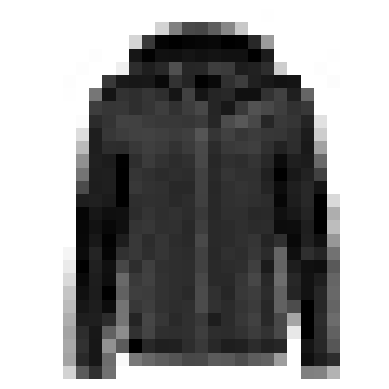

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

NameError: ignored

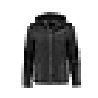

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
keras.backend.clear_session()

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[41,]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [18]:
keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)
keras_class

<ipython-input-18-7e8a91a940c3>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [19]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)
}
rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Epoch 1/100
[CV] END ...........................n_hidden=3, n_neurons=94; total time=   0.6s


Epoch 1/100
[CV] END ...........................n_hidden=3, n_neurons=94; total time=   0.5s


Epoch 1/100
[CV] END ...........................n_hidden=3, n_neurons=94; total time=   0.5s


Epoch 1/100
[CV] END ...........................n_hidden=0, n_neurons=53; total time=   0.5s


Epoch 1/100


[CV] END ...........................n_hidden=0, n_neurons=53; total time=   0.5s
Epoch 1/100
[CV] END ...........................n_hidden=0, n_neurons=53; total time=   0.4s


Epoch 1/100
[CV] END ...........................n_hidden=1, n_neurons=19; total time=   0.5s


Epoch 1/100
[CV] END ...........................n_hidden=1, n_neurons=19; total time=   0.5s


Epoch 1/100
[CV] END ...........................n_hidden=1, n_neurons=19; total time=   0.5s


Epoch 1/100
[CV] END ...........................n_hidden=1, n_neurons=25; total time=   0.5s


Epoch 1/100
[CV] END ...........................n_hidden=1, n_neurons=25; total time=   0.5s


KeyboardInterrupt: ignored

In [ ]:
rnd_search_cv.best_params_